In [1]:
>>> import collections

In [2]:
import neattext as nfx

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the dataset
df=pd.read_csv('emotions.csv',encoding='cp437')


In [5]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [6]:
df.shape

(56791, 2)

In [7]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [8]:
#checking for missing values 
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [9]:
#value counts of emotions
df["Emotion"].value_counts()

Emotion
joy         17805
sadness     13825
fear         7783
anger        7702
surprise     4781
neutral      2254
love         1639
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

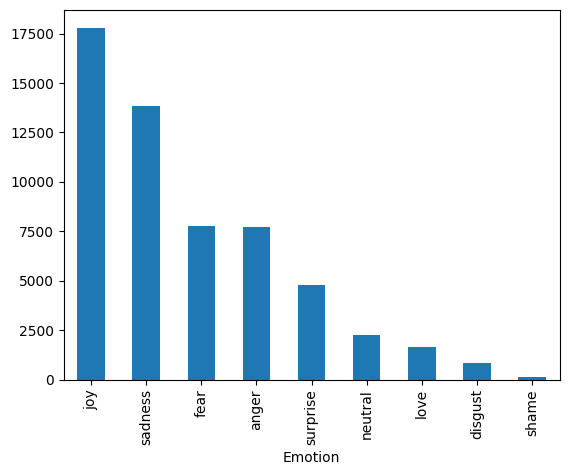

In [10]:
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='Emotion', ylabel='count'>

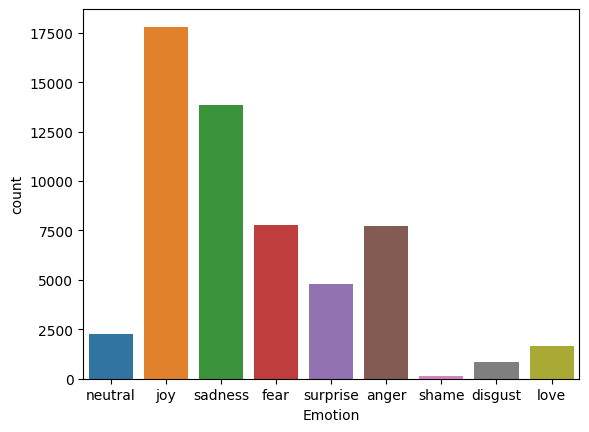

In [11]:
sns.countplot(x='Emotion',data=df)

  df.describe

In [12]:
df.describe()

Emotion                                               Text
count    56791                                              56791
unique       9                                              52572
top        joy  ['You Hurt Me But I Still Love You.', 'True Lo...
freq     17805                                                134

In [13]:
#text cleaning
#remove noise ,stopwords,specialcharacters,punctuations,emojis

In [14]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [15]:
df['clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [16]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_userhandles)

In [17]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_punctuations)

In [18]:
df[['Text','clean_Text']]

Text   
0                                                 Why ?   \
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
56786  im having ssa examination tomorrow in the morn...   
56787  i constantly worry about their fight against n...   
56788  i feel its important to share this info for th...   
56789  i truly feel that if you are passionate enough...   
56790  i feel like i just wanna buy any cute make up ...   

                                              clean_Text  
0                                                         
1                         Sage Act upgrade list tommorow  
2      WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3      eye  true hazel eyeand brilliant  Regular feat...  
4        ugh babe hugggzzz u  babe naamazed nga ako e...  
...                                                  ...  
56786  im ssa examination tomorrow morning im prepare...  
56787  constantly worry fight nature push limits inne...  
56788         feel important share info experience thing  
56789            truly feel passionate stay true succeed  
56790                    feel like wanna buy cute online  

[56791 rows x 2 columns]

In [19]:
 #keyword extraction 
    #extract some of the most commonest words per class of emotions
    

In [20]:
from collections import Counter

In [21]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [22]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

In [23]:
emotion_list

['neutral',
 'joy',
 'sadness',
 'fear',
 'surprise',
 'anger',
 'shame',
 'disgust',
 'love']

In [24]:
joy_list=df[df["Emotion"]=='joy']['clean_Text'].tolist()

In [25]:
#joy document
joy_docx=' '.join(joy_list)

In [26]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ΓòƒΓòô ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class ja

In [27]:
#extract keywords
keyword_joy=extract_keywords(joy_docx)

In [28]:
keyword_joy

{'feel': 5167,
 'feeling': 2108,
 'like': 1732,
 'im': 1131,
 'time': 961,
 'day': 932,
 'amp': 720,
 'work': 662,
 'love': 624,
 'today': 623,
 'good': 586,
 'happy': 558,
 'Im': 555,
 'going': 522,
 'know': 498,
 'tomorrow': 484,
 'life': 483,
 'people': 466,
 'Christmas': 453,
 'got': 453,
 'night': 387,
 'home': 387,
 'think': 383,
 'morning': 352,
 'want': 348,
 'school': 347,
 'little': 338,
 'year': 329,
 ':)': 311,
 'days': 310,
 'way': 309,
 'week': 309,
 'things': 301,
 'right': 293,
 'joy': 293,
 'hours': 286,
 'new': 279,
 'pretty': 275,
 'need': 267,
 'long': 266,
 'family': 266,
 '2': 262,
 'excited': 256,
 'felt': 253,
 'cant': 252,
 'great': 250,
 'tonight': 233,
 'ive': 233,
 'better': 225,
 'sleep': 222}

In [29]:
#plot 
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()


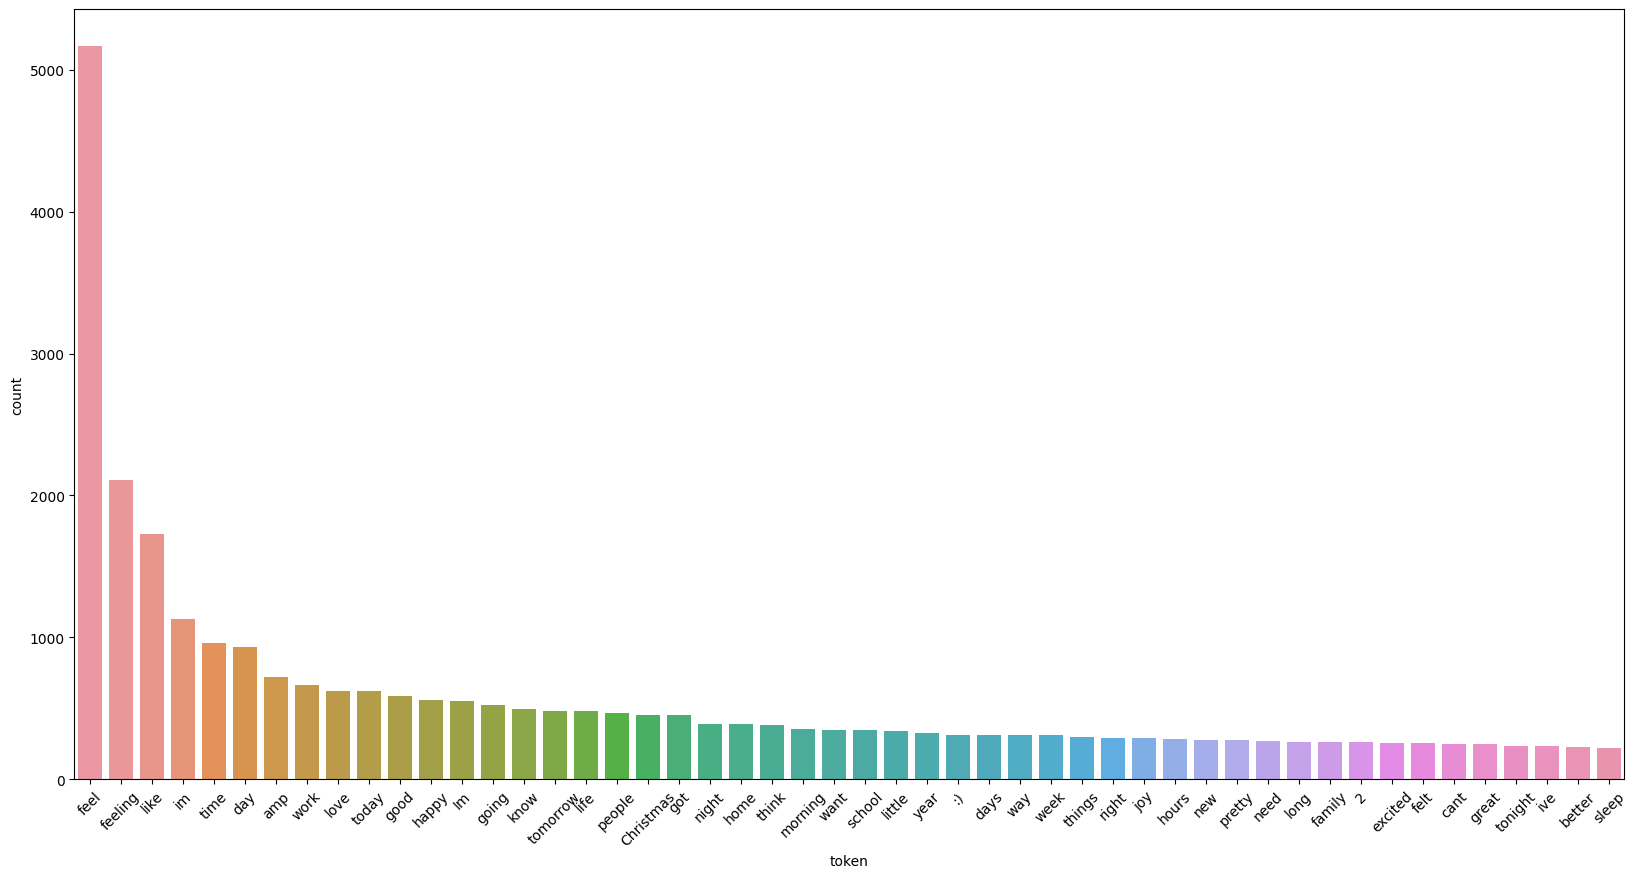

In [30]:
plot_most_common_words(keyword_joy)

In [31]:
surprise_list=df[df["Emotion"]=='surprise']['clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)

In [32]:
keyword_surprise=extract_keywords(surprise_docx)


In [33]:
keyword_surprise

{'feel': 487,
 'en': 299,
 'een': 294,
 'feeling': 283,
 'de': 252,
 'like': 234,
 'Im': 227,
 ':)': 201,
 'know': 198,
 'im': 176,
 'home': 168,
 'time': 163,
 'today': 161,
 'day': 158,
 'van': 153,
 'love': 144,
 'got': 140,
 'ik': 137,
 'going': 137,
 'amp': 127,
 'met': 127,
 'nog': 126,
 'RT': 123,
 'voor': 116,
 'surprise': 115,
 'good': 115,
 'think': 112,
 'actually': 112,
 'je': 110,
 'tomorrow': 106,
 'people': 105,
 'birthday': 101,
 'night': 100,
 'wait': 97,
 'coming': 97,
 'het': 96,
 'lol': 90,
 'friends': 89,
 'little': 89,
 'dan': 87,
 'work': 86,
 'new': 86,
 'funny': 86,
 'Christmas': 84,
 'mom': 84,
 'u': 83,
 'surprised': 83,
 'amazed': 83,
 'thought': 80,
 'find': 77}

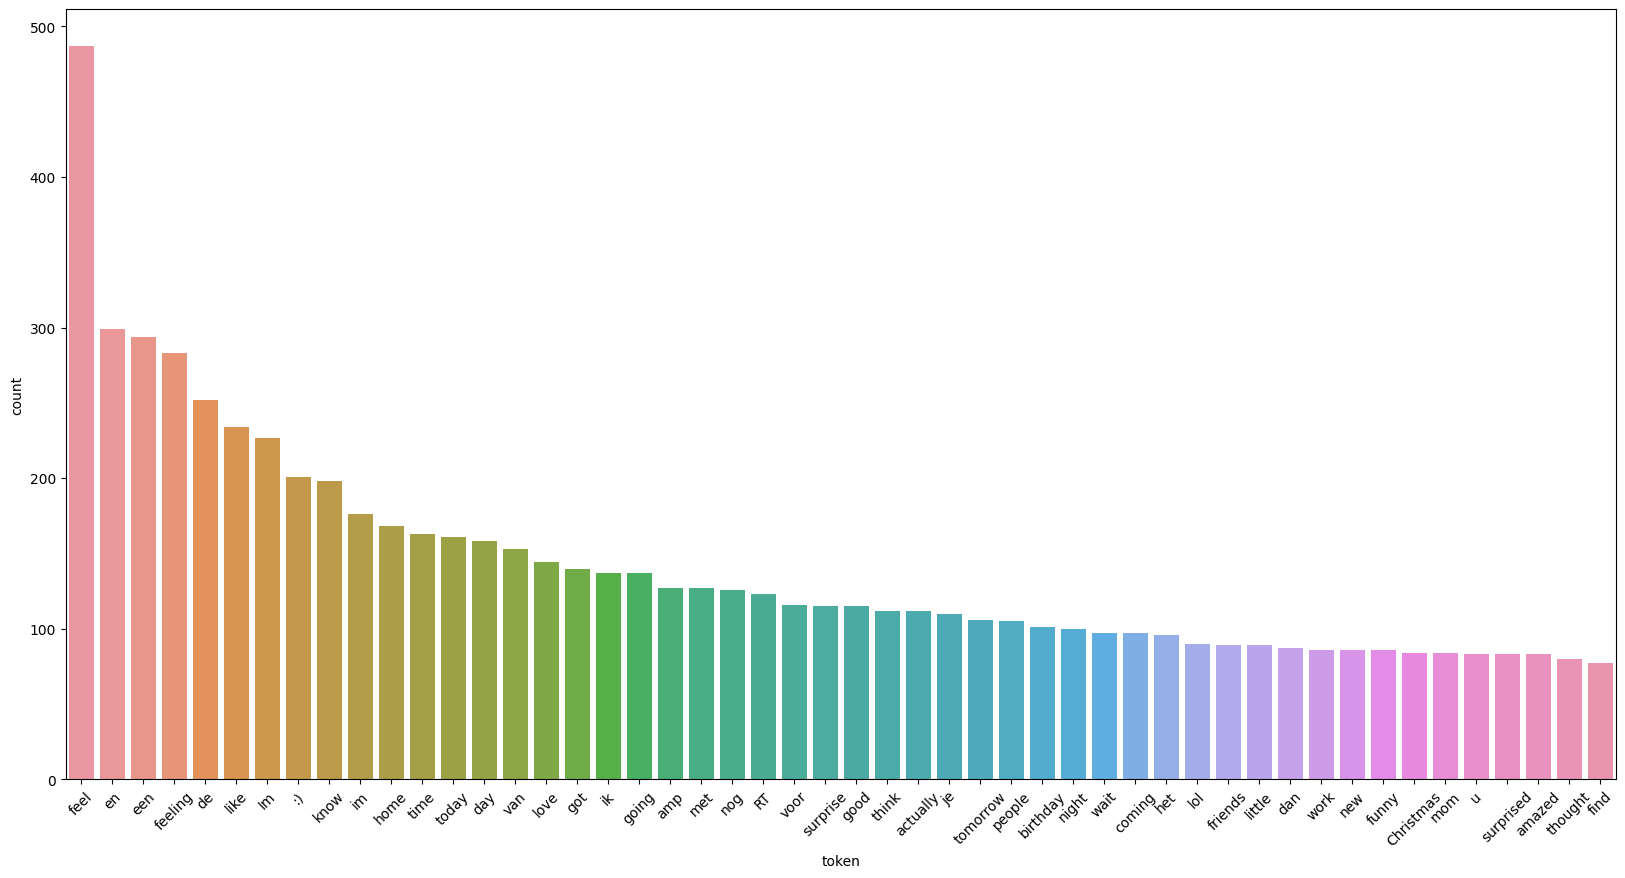

In [34]:
plot_most_common_words(keyword_surprise)

In [35]:
pip install wordcloud


  Using cached wordcloud-1.9.1.1-cp38-cp38-win_amd64.whl (153 kB)


In [36]:
from wordcloud import WordCloud

In [37]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

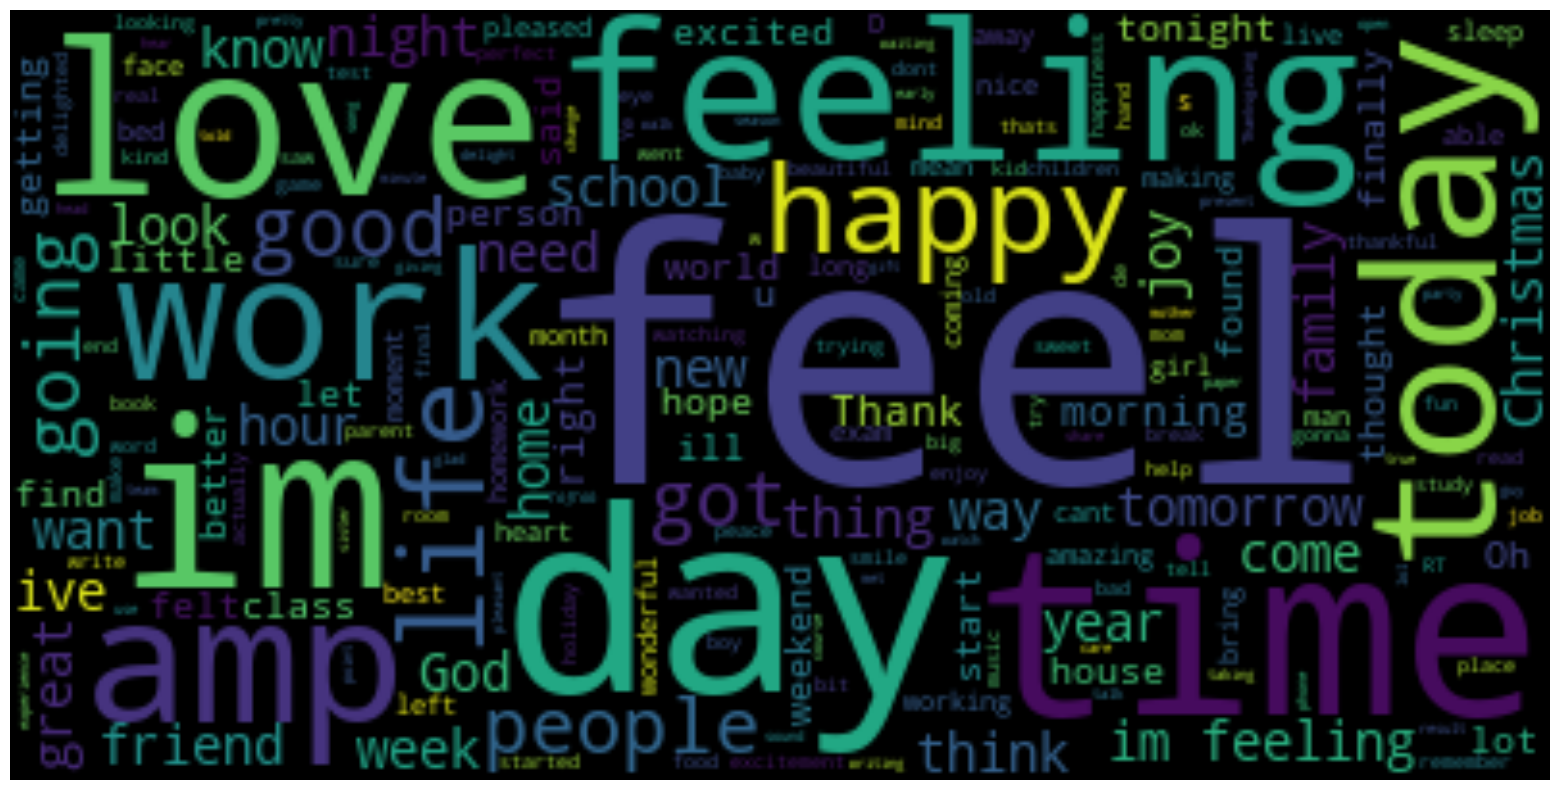

In [38]:
plot_wordcloud(joy_docx)

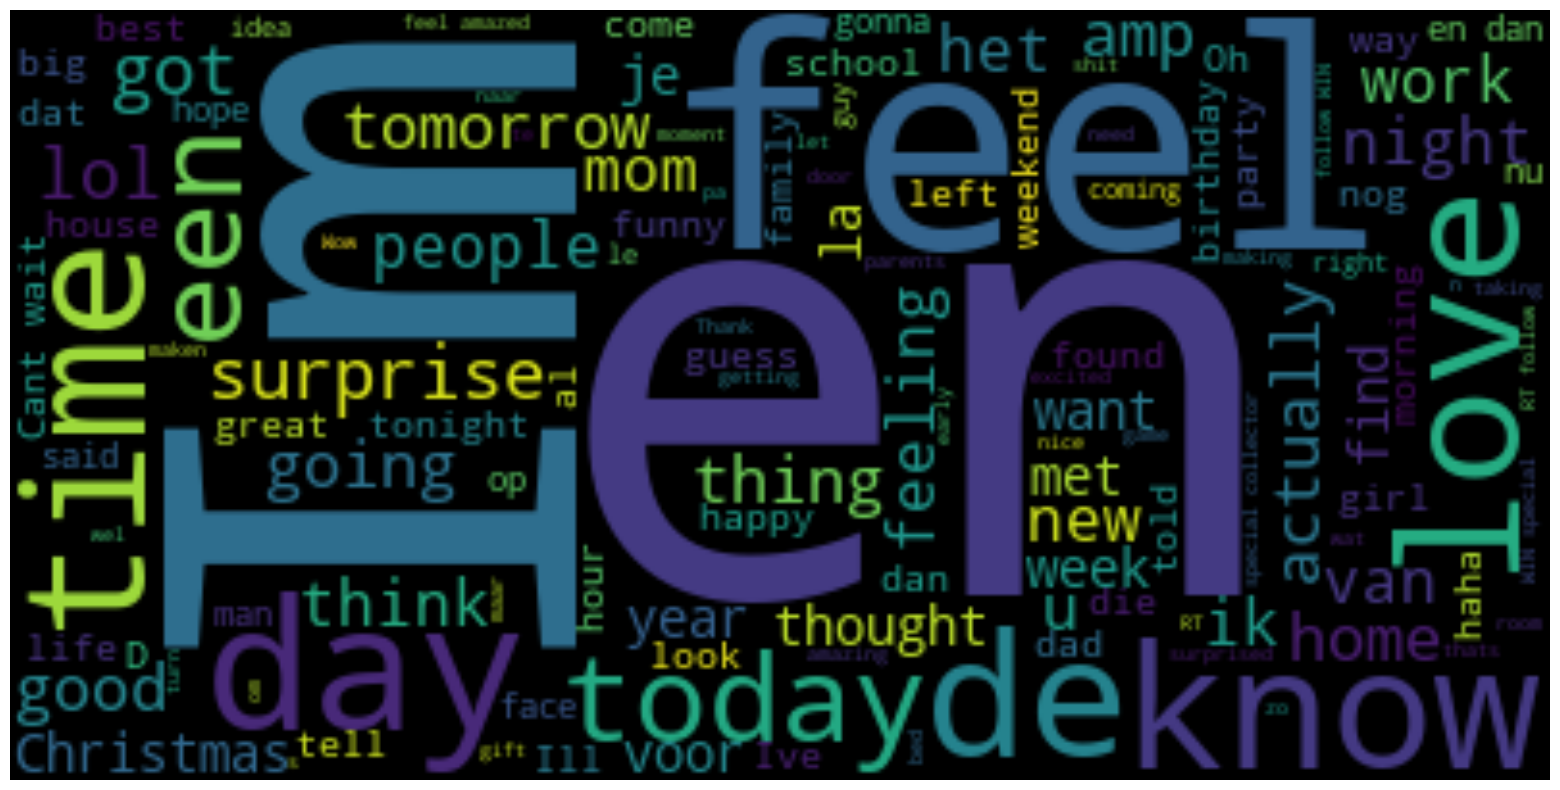

In [39]:
plot_wordcloud(surprise_docx)

In [40]:
sadness_list=df[df["Emotion"]=='sadness']['clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)

In [41]:
keyword_sadness=extract_keywords(sadness_docx)


In [42]:
keyword_sadness

{'feel': 4361,
 'I': 3764,
 'Sad': 3362,
 'You': 3353,
 'DonΓòƒΓòôT': 2948,
 'IΓòƒΓòôM': 2147,
 'feeling': 2020,
 '(': 1763,
 'Care': 1612,
 'Like': 1612,
 'ItΓòƒΓòôS': 1608,
 'Love': 1495,
 'Pain': 1483,
 'Heart': 1480,
 'Person': 1476,
 'The': 1475,
 'YouΓòƒΓòôRe': 1474,
 'like': 1453,
 'People': 1375,
 'Things': 1212,
 'Smile': 1209,
 'Status\\xa0': 1206,
 'Life': 1095,
 'Sometimes': 1086,
 'Me': 1077,
 'Know': 1074,
 'Whatsapp': 1073,
 'im': 964,
 'Feel': 945,
 'Hurt': 944,
 'Think': 940,
 'Smiling': 940,
 'CanΓòƒΓòôT': 938,
 'Inside': 938,
 'Tears': 817,
 'Trying': 811,
 'Crying': 810,
 'Cry': 807,
 'Want': 806,
 'Eyes': 804,
 'time': 749,
 'Happy': 679,
 'Need': 678,
 'Worst': 675,
 'Tell': 673,
 'Hurts': 673,
 'Much': 670,
 'Anymore': 670,
 'Far': 670,
 'It': 670}

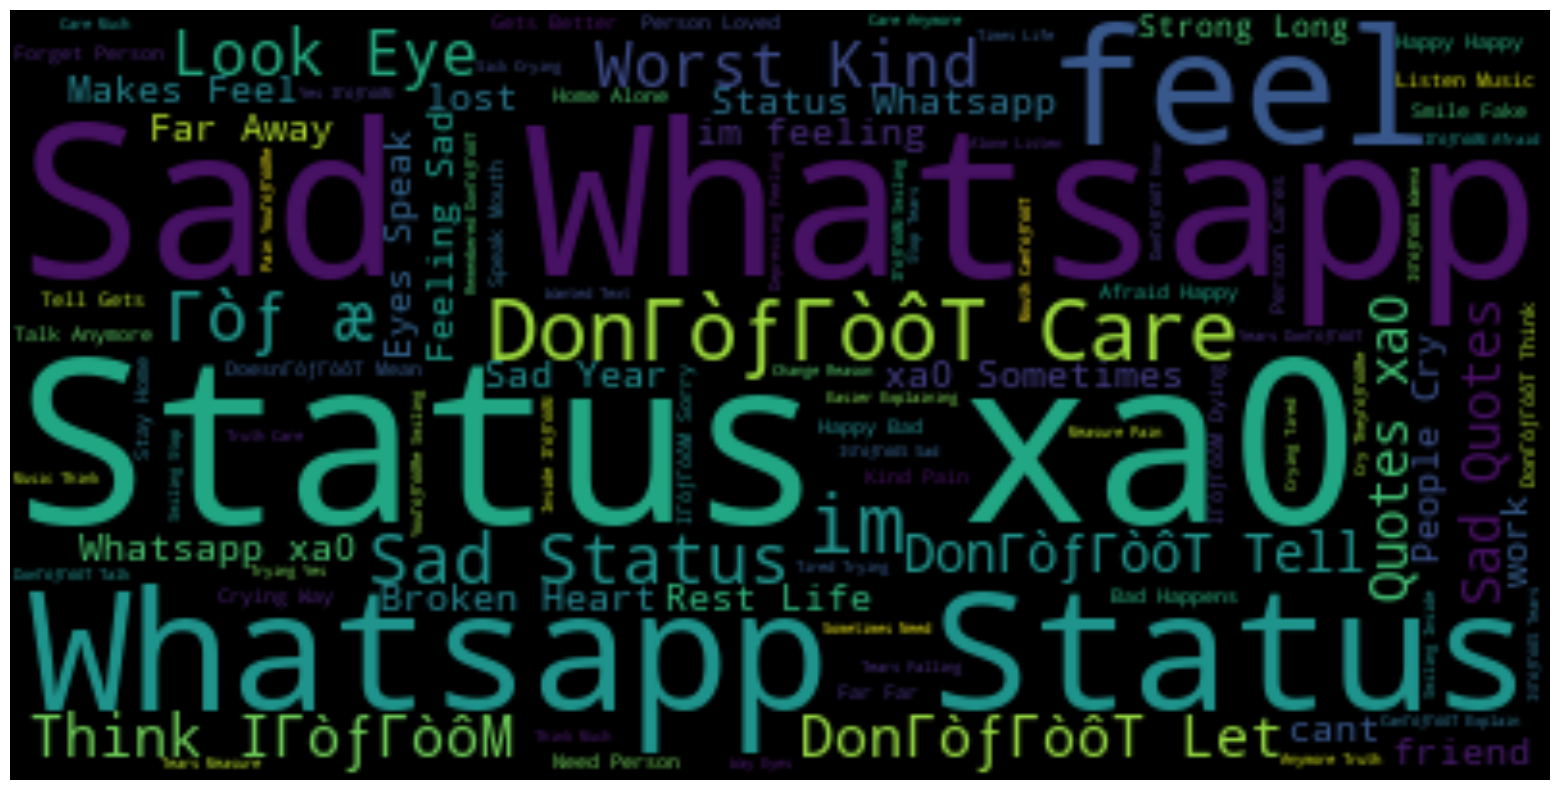

In [43]:
plot_wordcloud(sadness_docx)

In [44]:
###machine learning algorithms
#navies bayes
#logistic regression
#knn
#decision tree

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [47]:
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#Build the features from out text


In [50]:
xfeatures=df['clean_Text']
ylabels=df['Emotion']

In [51]:
xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
56786    im ssa examination tomorrow morning im prepare...
56787    constantly worry fight nature push limits inne...
56788           feel important share info experience thing
56789              truly feel passionate stay true succeed
56790                      feel like wanna buy cute online
Name: clean_Text, Length: 56791, dtype: object

In [52]:
cv=CountVectorizer()
x=cv.fit_transform(xfeatures)

In [53]:
cv.get_feature_names_out()

array(['00', '000', '000γöéme', ..., 'γûäγê', 'γûäγöéγûä', 'γü'],
      dtype=object)

In [54]:
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x,ylabels,test_size=0.3,random_state=42)

In [55]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [56]:
#accuracy
#method1
nv_model.score(x_test,y_test)

0.5611574128418828

In [57]:
#predictions
y_pred_for_nv=nv_model.predict(x_test)

In [58]:
y_pred_for_nv

array(['joy', 'joy', 'anger', ..., 'fear', 'joy', 'surprise'], dtype='<U8')

In [59]:
#make a single prediction
#vectorized our test
#applied our model

In [60]:
simple_text=[" i am happy"]

In [61]:

vect=cv.transform(simple_text).toarray()

In [62]:
#make predicction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [63]:
#check for the prediction probabilit(percentage)/ confidence score
nv_model.predict_proba(vect)

array([[4.54665370e-02, 4.00155316e-04, 1.60149201e-02, 7.75135661e-01,
        6.18267637e-04, 3.65650420e-04, 1.20076202e-01, 9.52246686e-06,
        4.19130837e-02]])

In [64]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'love', 'neutral', 'sadness',
       'shame', 'surprise'], dtype='<U8')

In [65]:
np.max(nv_model.predict_proba(vect))

0.7751356613684843

In [66]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(simple_text).toarray()
    prediction=nv_model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{},prediction score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [67]:
predict_emotion(['i am happy'],nv_model)


prediction:joy,prediction score:0.7751356613684843


{'anger': 0.04546653697262129,
 'disgust': 0.0004001553160532717,
 'fear': 0.016014920087712877,
 'joy': 0.7751356613684843,
 'love': 0.0006182676366697609,
 'neutral': 0.0003656504198527932,
 'sadness': 0.12007620204000875,
 'shame': 9.522466855505483e-06,
 'surprise': 0.04191308369174089}

In [68]:
#model evaluation
#classification
print(classification_report(y_test,y_pred_for_nv))
import warnings
warnings.filterwarnings('always')

c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.67      0.39      0.49      2321
     disgust       0.55      0.05      0.08       244
        fear       0.66      0.59      0.62      2340
         joy       0.50      0.89      0.64      5324
        love       0.74      0.10      0.18       489
     neutral       0.23      0.02      0.04       681
     sadness       0.65      0.50      0.56      4159
       shame       0.00      0.00      0.00        38
    surprise       0.56      0.26      0.35      1442

    accuracy                           0.56     17038
   macro avg       0.51      0.31      0.33     17038
weighted avg       0.58      0.56      0.53     17038



c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
 m1=LogisticRegression(max_iter=1000)

In [70]:
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [71]:
pred1=m1.predict(x_test)

In [72]:
pred1

array(['joy', 'love', 'anger', ..., 'fear', 'fear', 'surprise'],
      dtype=object)

In [73]:
m1.score(x_test,y_test)

0.7082404038032633

In [74]:
text1=[" Sometimes the person you trust most is the one who trusts you the least"]

In [75]:
vector=cv.transform(text1).toarray()

In [76]:
m1.predict(vector)

array(['sadness'], dtype=object)

In [77]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

       anger       0.74      0.65      0.69      2321
     disgust       0.52      0.17      0.26       244
        fear       0.79      0.71      0.74      2340
         joy       0.70      0.81      0.75      5324
        love       0.83      0.70      0.76       489
     neutral       0.60      0.73      0.66       681
     sadness       0.71      0.73      0.72      4159
       shame       0.91      0.55      0.69        38
    surprise       0.60      0.46      0.52      1442

    accuracy                           0.71     17038
   macro avg       0.71      0.61      0.64     17038
weighted avg       0.71      0.71      0.70     17038



In [78]:
import pickle

In [79]:
pickle.dump(m1,open('logistic.pkl','wb'))

C:\Users\kishore\AppData\Local\Temp\ipykernel_24000\2004629836.py:1: ResourceWarning: unclosed file <_io.BufferedWriter name='logistic.pkl'>
  pickle.dump(m1,open('logistic.pkl','wb'))


In [80]:
import neattext as nfx

In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#load the dataset
df=pd.read_csv('emotions.csv',encoding='cp437')


In [83]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [84]:
df.shape

(56791, 2)

In [85]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [86]:
#checking for missing values 
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [87]:
#value counts of emotions
df["Emotion"].value_counts()

Emotion
joy         17805
sadness     13825
fear         7783
anger        7702
surprise     4781
neutral      2254
love         1639
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

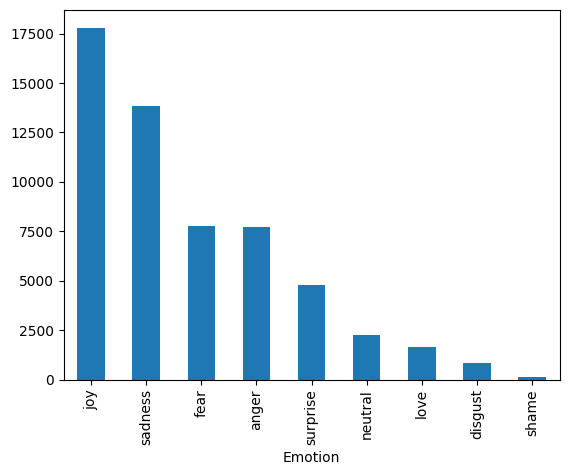

In [88]:
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='Emotion', ylabel='count'>

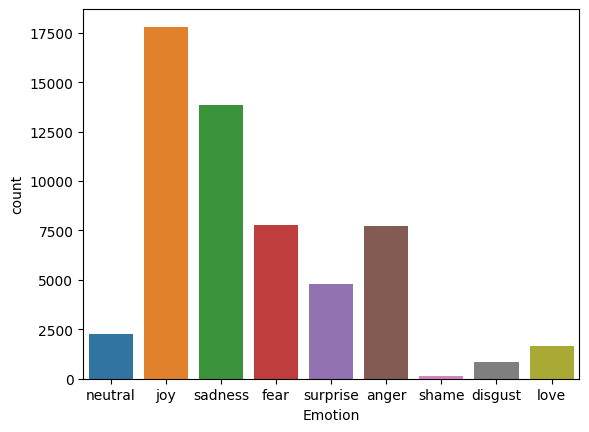

In [89]:
sns.countplot(x='Emotion',data=df)

  df.describe

In [90]:
df.describe()

Emotion                                               Text
count    56791                                              56791
unique       9                                              52572
top        joy  ['You Hurt Me But I Still Love You.', 'True Lo...
freq     17805                                                134

In [91]:
#text cleaning
#remove noise ,stopwords,specialcharacters,punctuations,emojis

In [92]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [93]:
df['clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [94]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_userhandles)

In [95]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_punctuations)

In [96]:
df[['Text','clean_Text']]

Text   
0                                                 Why ?   \
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
56786  im having ssa examination tomorrow in the morn...   
56787  i constantly worry about their fight against n...   
56788  i feel its important to share this info for th...   
56789  i truly feel that if you are passionate enough...   
56790  i feel like i just wanna buy any cute make up ...   

                                              clean_Text  
0                                                         
1                         Sage Act upgrade list tommorow  
2      WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3      eye  true hazel eyeand brilliant  Regular feat...  
4        ugh babe hugggzzz u  babe naamazed nga ako e...  
...                                                  ...  
56786  im ssa examination tomorrow morning im prepare...  
56787  constantly worry fight nature push limits inne...  
56788         feel important share info experience thing  
56789            truly feel passionate stay true succeed  
56790                    feel like wanna buy cute online  

[56791 rows x 2 columns]

In [97]:
 #keyword extraction 
    #extract some of the most commonest words per class of emotions
    

In [98]:
from collections import Counter

In [99]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [100]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

In [101]:
emotion_list

['neutral',
 'joy',
 'sadness',
 'fear',
 'surprise',
 'anger',
 'shame',
 'disgust',
 'love']

In [102]:
joy_list=df[df["Emotion"]=='joy']['clean_Text'].tolist()

In [103]:
#joy document
joy_docx=' '.join(joy_list)

In [104]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ΓòƒΓòô ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class ja

In [105]:
#extract keywords
keyword_joy=extract_keywords(joy_docx)

In [106]:
keyword_joy

{'feel': 5167,
 'feeling': 2108,
 'like': 1732,
 'im': 1131,
 'time': 961,
 'day': 932,
 'amp': 720,
 'work': 662,
 'love': 624,
 'today': 623,
 'good': 586,
 'happy': 558,
 'Im': 555,
 'going': 522,
 'know': 498,
 'tomorrow': 484,
 'life': 483,
 'people': 466,
 'Christmas': 453,
 'got': 453,
 'night': 387,
 'home': 387,
 'think': 383,
 'morning': 352,
 'want': 348,
 'school': 347,
 'little': 338,
 'year': 329,
 ':)': 311,
 'days': 310,
 'way': 309,
 'week': 309,
 'things': 301,
 'right': 293,
 'joy': 293,
 'hours': 286,
 'new': 279,
 'pretty': 275,
 'need': 267,
 'long': 266,
 'family': 266,
 '2': 262,
 'excited': 256,
 'felt': 253,
 'cant': 252,
 'great': 250,
 'tonight': 233,
 'ive': 233,
 'better': 225,
 'sleep': 222}

In [107]:
#plot 
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()


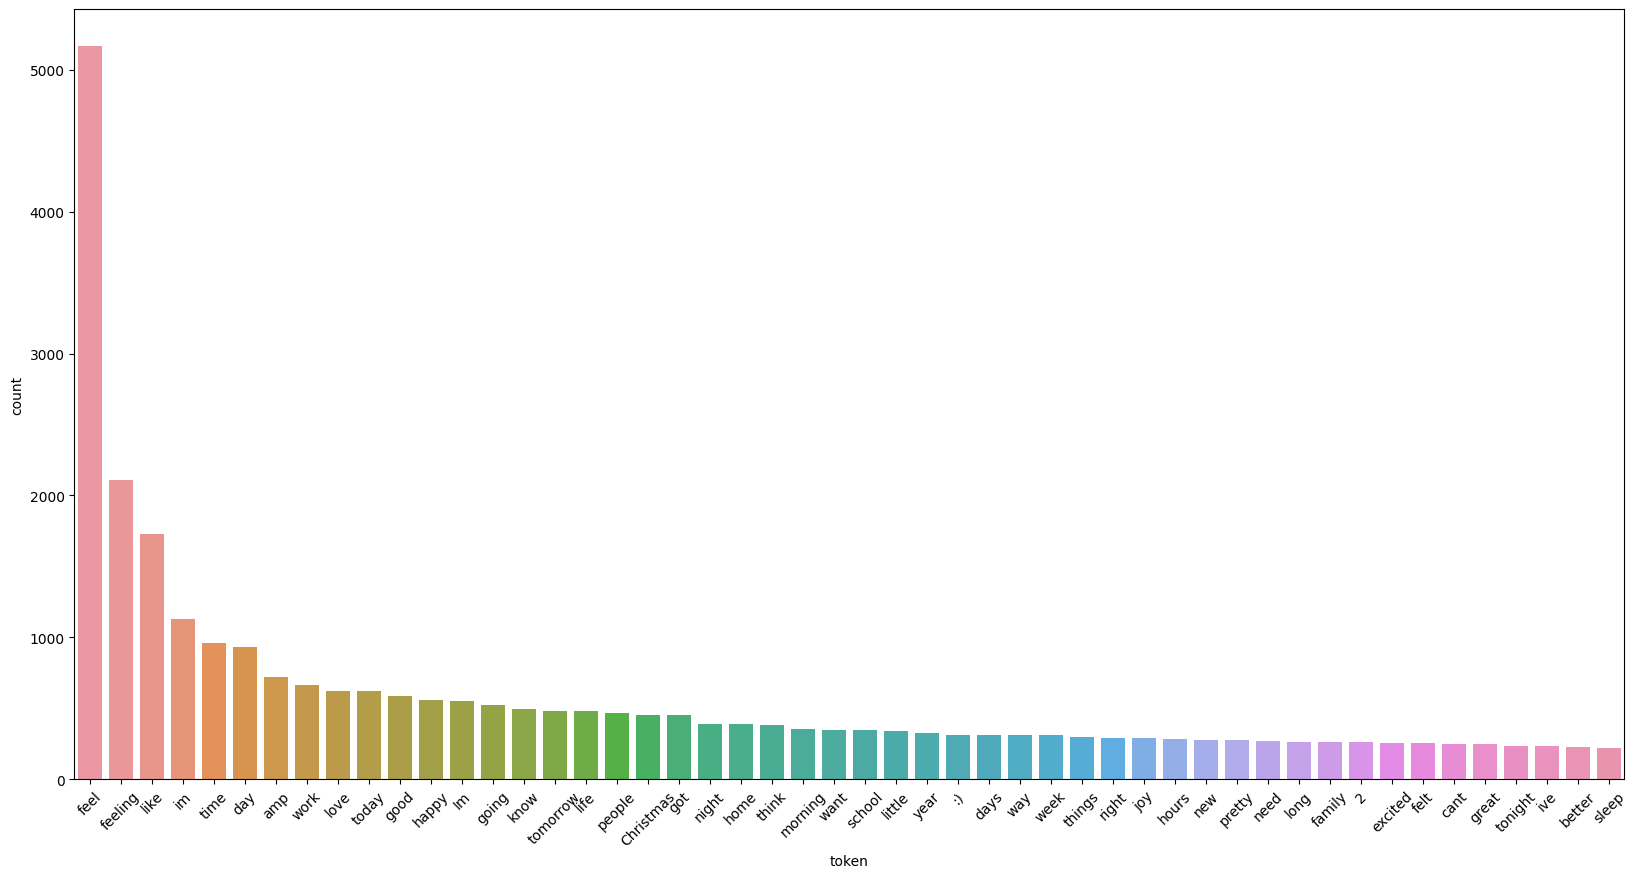

In [108]:
plot_most_common_words(keyword_joy)

In [109]:
surprise_list=df[df["Emotion"]=='surprise']['clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)

In [110]:
keyword_surprise=extract_keywords(surprise_docx)


In [111]:
keyword_surprise

{'feel': 487,
 'en': 299,
 'een': 294,
 'feeling': 283,
 'de': 252,
 'like': 234,
 'Im': 227,
 ':)': 201,
 'know': 198,
 'im': 176,
 'home': 168,
 'time': 163,
 'today': 161,
 'day': 158,
 'van': 153,
 'love': 144,
 'got': 140,
 'ik': 137,
 'going': 137,
 'amp': 127,
 'met': 127,
 'nog': 126,
 'RT': 123,
 'voor': 116,
 'surprise': 115,
 'good': 115,
 'think': 112,
 'actually': 112,
 'je': 110,
 'tomorrow': 106,
 'people': 105,
 'birthday': 101,
 'night': 100,
 'wait': 97,
 'coming': 97,
 'het': 96,
 'lol': 90,
 'friends': 89,
 'little': 89,
 'dan': 87,
 'work': 86,
 'new': 86,
 'funny': 86,
 'Christmas': 84,
 'mom': 84,
 'u': 83,
 'surprised': 83,
 'amazed': 83,
 'thought': 80,
 'find': 77}

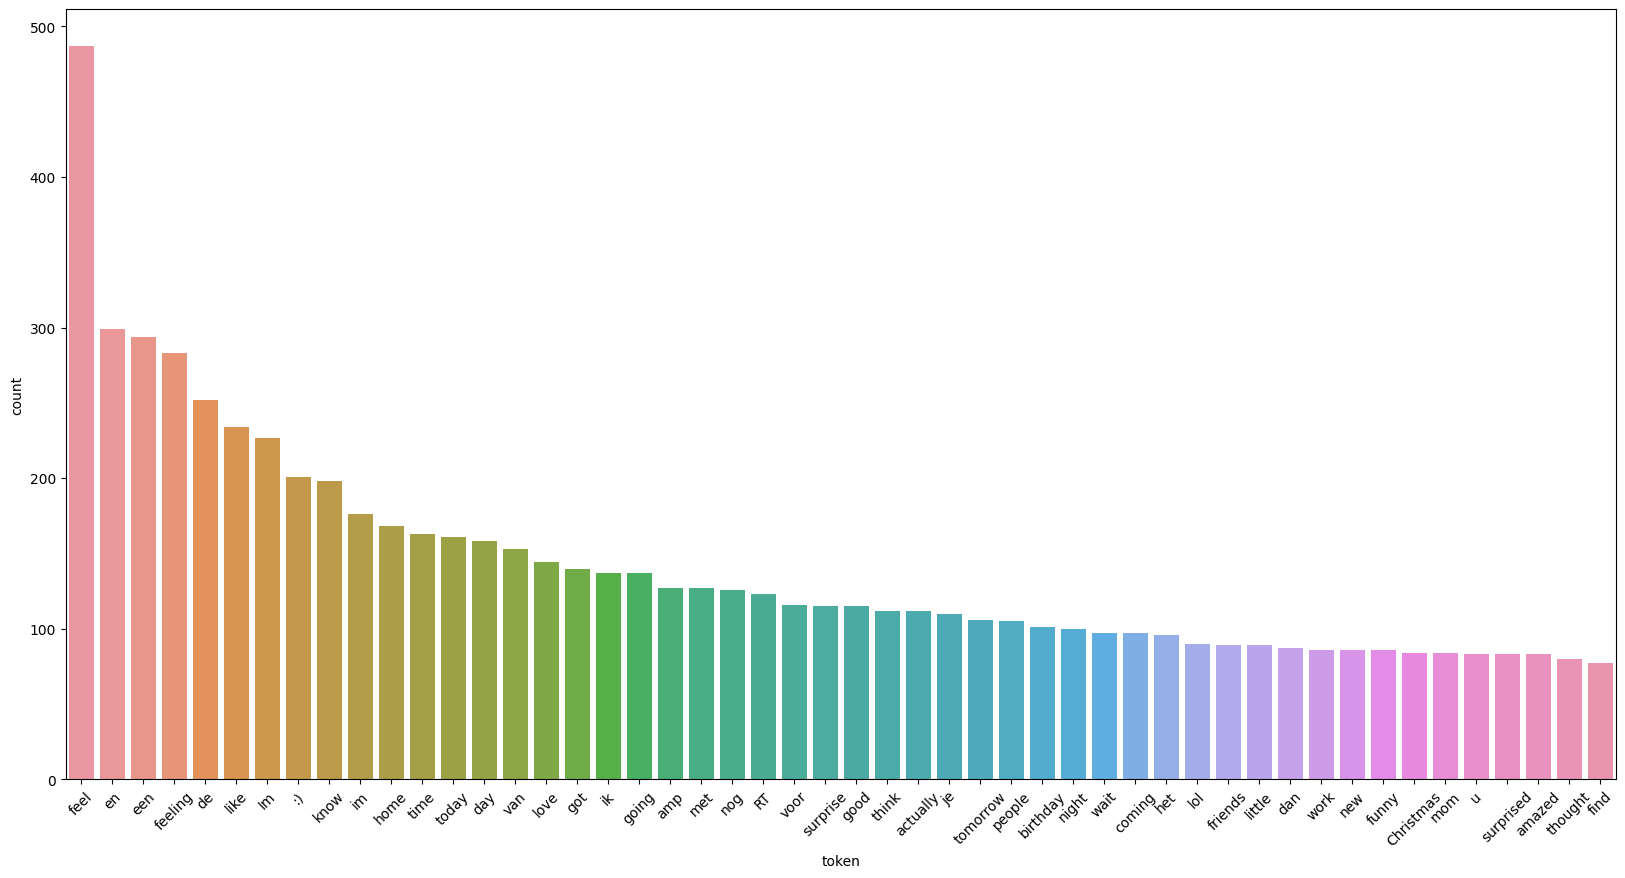

In [112]:
plot_most_common_words(keyword_surprise)

In [113]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x2d80cac6160>
c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [114]:
from wordcloud import WordCloud

In [115]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\env\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


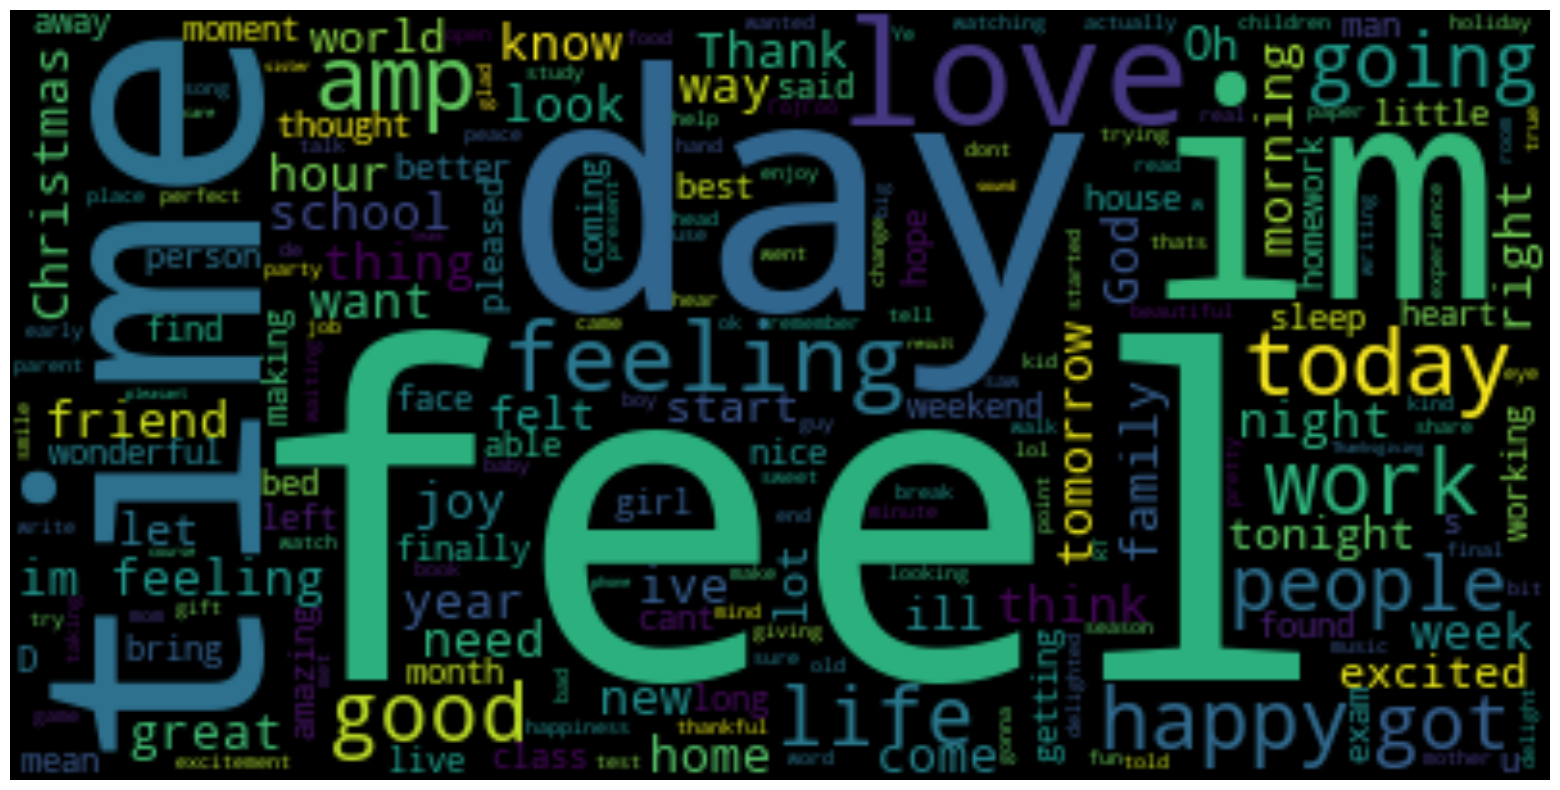

In [116]:
plot_wordcloud(joy_docx)

c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\env\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


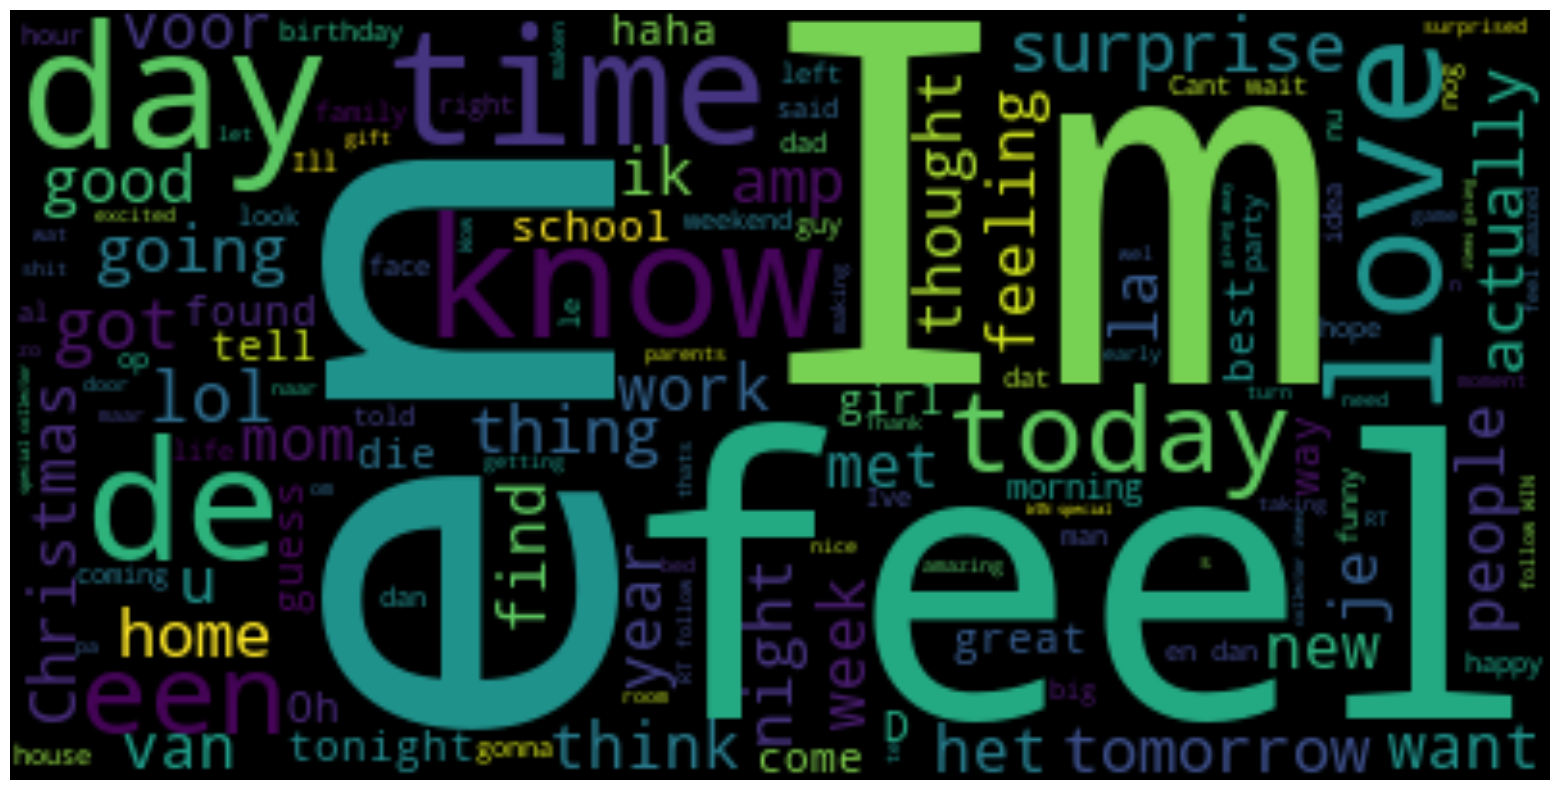

In [117]:
plot_wordcloud(surprise_docx)

In [118]:
sadness_list=df[df["Emotion"]=='sadness']['clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)

In [119]:
keyword_sadness=extract_keywords(sadness_docx)


In [120]:
keyword_sadness

{'feel': 4361,
 'I': 3764,
 'Sad': 3362,
 'You': 3353,
 'DonΓòƒΓòôT': 2948,
 'IΓòƒΓòôM': 2147,
 'feeling': 2020,
 '(': 1763,
 'Care': 1612,
 'Like': 1612,
 'ItΓòƒΓòôS': 1608,
 'Love': 1495,
 'Pain': 1483,
 'Heart': 1480,
 'Person': 1476,
 'The': 1475,
 'YouΓòƒΓòôRe': 1474,
 'like': 1453,
 'People': 1375,
 'Things': 1212,
 'Smile': 1209,
 'Status\\xa0': 1206,
 'Life': 1095,
 'Sometimes': 1086,
 'Me': 1077,
 'Know': 1074,
 'Whatsapp': 1073,
 'im': 964,
 'Feel': 945,
 'Hurt': 944,
 'Think': 940,
 'Smiling': 940,
 'CanΓòƒΓòôT': 938,
 'Inside': 938,
 'Tears': 817,
 'Trying': 811,
 'Crying': 810,
 'Cry': 807,
 'Want': 806,
 'Eyes': 804,
 'time': 749,
 'Happy': 679,
 'Need': 678,
 'Worst': 675,
 'Tell': 673,
 'Hurts': 673,
 'Much': 670,
 'Anymore': 670,
 'Far': 670,
 'It': 670}

c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\env\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


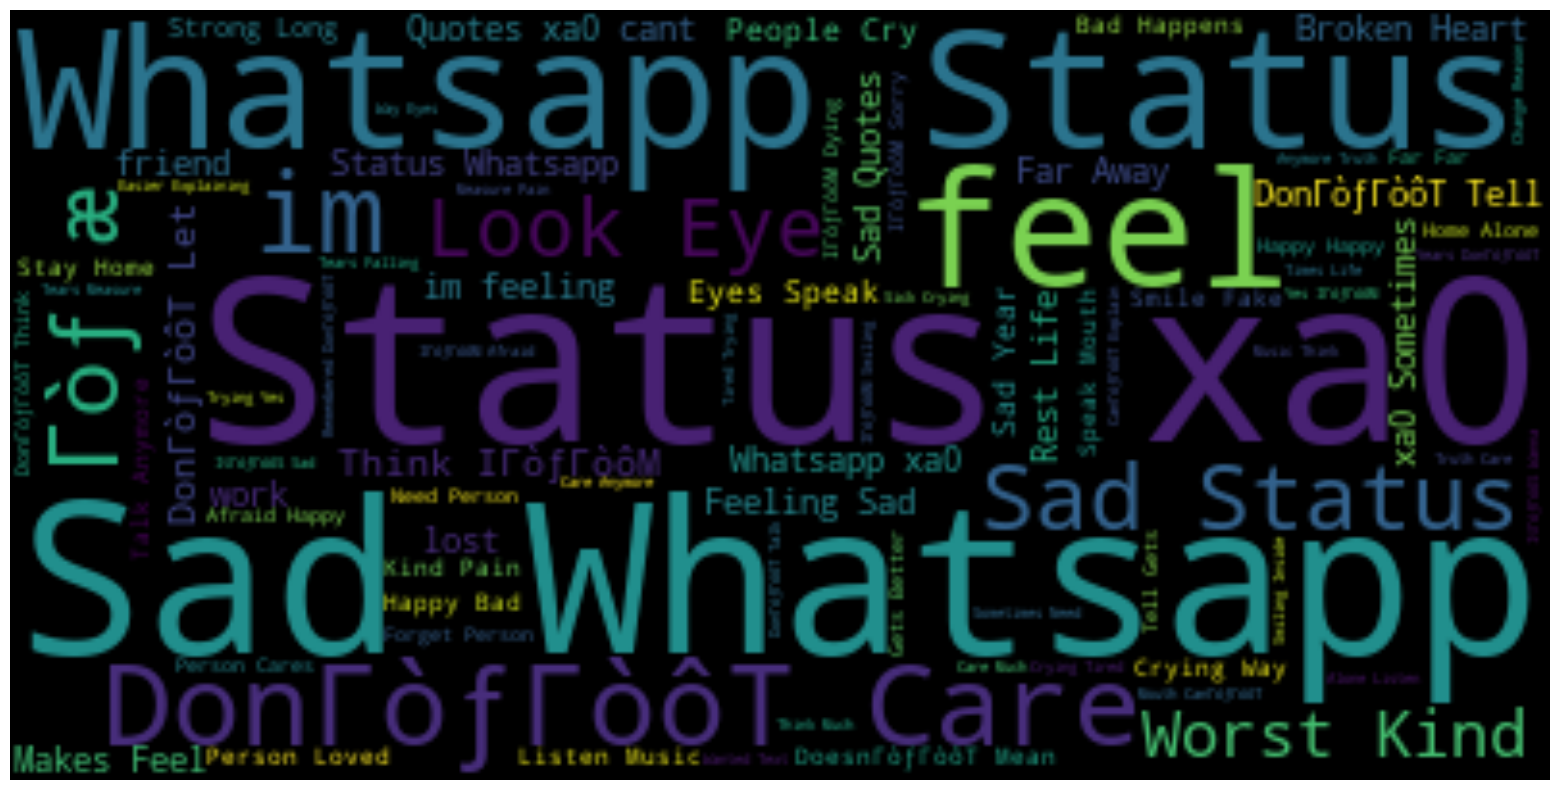

In [121]:
plot_wordcloud(sadness_docx)

In [122]:
###machine learning algorithms
#navies bayes
#logistic regression
#knn
#decision tree

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [124]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\kishore\Desktop\ML Projects\new_projects\Facebook post emotion prediction\env\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
from sklearn.model_selection import train_test_split

: 

In [ ]:
#Build the features from out text


: 

In [ ]:
xfeatures=df['clean_Text']
ylabels=df['Emotion']

: 

In [ ]:
xfeatures

: 

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(xfeatures)

: 

In [ ]:
cv.get_feature_names_out()

: 

In [ ]:
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x,ylabels,test_size=0.3,random_state=42)

: 

In [ ]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

: 

In [ ]:
#accuracy
#method1
nv_model.score(x_test,y_test)

: 

In [ ]:
#predictions
y_pred_for_nv=nv_model.predict(x_test)

: 

In [ ]:
y_pred_for_nv

: 

In [ ]:
#make a single prediction
#vectorized our test
#applied our model

: 

In [ ]:
simple_text=[" i am happy"]

: 

In [ ]:

vect=cv.transform(simple_text).toarray()

: 

In [ ]:
#make predicction
nv_model.predict(vect)

: 

In [ ]:
#check for the prediction probabilit(percentage)/ confidence score
nv_model.predict_proba(vect)

: 

In [ ]:
nv_model.classes_

: 

In [ ]:
np.max(nv_model.predict_proba(vect))

: 

In [ ]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(simple_text).toarray()
    prediction=nv_model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{},prediction score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

: 

In [ ]:
predict_emotion(['i am happy'],nv_model)


: 

In [ ]:
#model evaluation
#classification
print(classification_report(y_test,y_pred_for_nv))
import warnings
warnings.filterwarnings('always')

: 

In [ ]:
 m1=LogisticRegression(max_iter=1000)

: 

In [ ]:
m1.fit(x_train,y_train)

: 

In [ ]:
pred1=m1.predict(x_test)

: 

In [ ]:
pred1

: 

In [ ]:
m1.score(x_test,y_test)

: 

In [ ]:
text1=[" Sometimes the person you trust most is the one who trusts you the least"]

: 

In [ ]:
vector=cv.transform(text1).toarray()

: 

In [ ]:
m1.predict(vector)

: 

In [ ]:
print(classification_report(y_test,pred1))

: 

In [ ]:
import pickle

: 

In [ ]:
pickle.dump(m1,open('logistic.pkl','wb'))

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
import neattext as nfx

: 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

: 

In [ ]:
#load the dataset
df=pd.read_csv('emotions.csv',encoding='cp437')


: 

In [ ]:
df.head()

: 

In [ ]:
df.shape

: 

In [ ]:
df.dtypes

: 

In [ ]:
#checking for missing values 
df.isnull().sum()

: 

In [ ]:
#value counts of emotions
df["Emotion"].value_counts()

: 

In [ ]:
df['Emotion'].value_counts().plot(kind='bar')

: 

In [ ]:
sns.countplot(x='Emotion',data=df)

: 

  df.describe

In [ ]:
df.describe()

: 

In [ ]:
#text cleaning
#remove noise ,stopwords,specialcharacters,punctuations,emojis

: 

In [ ]:
dir(nfx)

: 

In [ ]:
df['clean_Text']=df['Text'].apply(nfx.remove_stopwords)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_userhandles)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_punctuations)

: 

In [ ]:
df[['Text','clean_Text']]

: 

In [ ]:
 #keyword extraction 
    #extract some of the most commonest words per class of emotions
    

: 

In [ ]:
from collections import Counter

: 

In [ ]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

: 

In [ ]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

: 

In [ ]:
emotion_list

: 

In [ ]:
joy_list=df[df["Emotion"]=='joy']['clean_Text'].tolist()

: 

In [ ]:
#joy document
joy_docx=' '.join(joy_list)

: 

In [ ]:
joy_docx

: 

In [ ]:
#extract keywords
keyword_joy=extract_keywords(joy_docx)

: 

In [ ]:
keyword_joy

: 

In [ ]:
#plot 
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()


: 

In [ ]:
plot_most_common_words(keyword_joy)

: 

In [ ]:
surprise_list=df[df["Emotion"]=='surprise']['clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)

: 

In [ ]:
keyword_surprise=extract_keywords(surprise_docx)


: 

In [ ]:
keyword_surprise

: 

In [ ]:
plot_most_common_words(keyword_surprise)

: 

In [ ]:
pip install wordcloud

: 

In [ ]:
from wordcloud import WordCloud

: 

In [ ]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

: 

In [ ]:
plot_wordcloud(joy_docx)

: 

In [ ]:
plot_wordcloud(surprise_docx)

: 

In [ ]:
sadness_list=df[df["Emotion"]=='sadness']['clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)

: 

In [ ]:
keyword_sadness=extract_keywords(sadness_docx)


: 

In [ ]:
keyword_sadness

: 

In [ ]:
plot_wordcloud(sadness_docx)

: 

In [ ]:
###machine learning algorithms
#navies bayes
#logistic regression
#knn
#decision tree

: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

: 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

: 

In [ ]:
from sklearn.model_selection import train_test_split

: 

In [ ]:
#Build the features from out text


: 

In [ ]:
xfeatures=df['clean_Text']
ylabels=df['Emotion']

: 

In [ ]:
xfeatures

: 

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(xfeatures)

: 

In [ ]:
cv.get_feature_names_out()

: 

In [ ]:
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x,ylabels,test_size=0.3,random_state=42)

: 

In [ ]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

: 

In [ ]:
#accuracy
#method1
nv_model.score(x_test,y_test)

: 

In [ ]:
#predictions
y_pred_for_nv=nv_model.predict(x_test)

: 

In [ ]:
y_pred_for_nv

: 

In [ ]:
#make a single prediction
#vectorized our test
#applied our model

: 

In [ ]:
simple_text=[" i am happy"]

: 

In [ ]:

vect=cv.transform(simple_text).toarray()

: 

In [ ]:
#make predicction
nv_model.predict(vect)

: 

In [ ]:
#check for the prediction probabilit(percentage)/ confidence score
nv_model.predict_proba(vect)

: 

In [ ]:
nv_model.classes_

: 

In [ ]:
np.max(nv_model.predict_proba(vect))

: 

In [ ]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(simple_text).toarray()
    prediction=nv_model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{},prediction score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

: 

In [ ]:
predict_emotion(['i am happy'],nv_model)


: 

In [ ]:
#model evaluation
#classification
print(classification_report(y_test,y_pred_for_nv))
import warnings
warnings.filterwarnings('always')

: 

In [ ]:
 m1=LogisticRegression(max_iter=1000)

: 

In [ ]:
m1.fit(x_train,y_train)

: 

In [ ]:
pred1=m1.predict(x_test)

: 

In [ ]:
pred1

: 

In [ ]:
m1.score(x_test,y_test)

: 

In [ ]:
text1=[" Sometimes the person you trust most is the one who trusts you the least"]

: 

In [ ]:
vector=cv.transform(text1).toarray()

: 

In [ ]:
m1.predict(vector)

: 

In [ ]:
print(classification_report(y_test,pred1))

: 

In [ ]:
import pickle

: 

In [ ]:
pickle.dump(m1,open('logistic.pkl','wb'))

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
import neattext as nfx

: 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

: 

In [ ]:
#load the dataset
df=pd.read_csv('emotions.csv',encoding='cp437')


: 

In [ ]:
df.head()

: 

In [ ]:
df.shape

: 

In [ ]:
df.dtypes

: 

In [ ]:
#checking for missing values 
df.isnull().sum()

: 

In [ ]:
#value counts of emotions
df["Emotion"].value_counts()

: 

In [ ]:
df['Emotion'].value_counts().plot(kind='bar')

: 

In [ ]:
sns.countplot(x='Emotion',data=df)

: 

  df.describe

In [ ]:
df.describe()

: 

In [ ]:
#text cleaning
#remove noise ,stopwords,specialcharacters,punctuations,emojis

: 

In [ ]:
dir(nfx)

: 

In [ ]:
df['clean_Text']=df['Text'].apply(nfx.remove_stopwords)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_userhandles)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_punctuations)

: 

In [ ]:
df[['Text','clean_Text']]

: 

In [ ]:
 #keyword extraction 
    #extract some of the most commonest words per class of emotions
    

: 

In [ ]:
from collections import Counter

: 

In [ ]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

: 

In [ ]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

: 

In [ ]:
emotion_list

: 

In [ ]:
joy_list=df[df["Emotion"]=='joy']['clean_Text'].tolist()

: 

In [ ]:
#joy document
joy_docx=' '.join(joy_list)

: 

In [ ]:
joy_docx

: 

In [ ]:
#extract keywords
keyword_joy=extract_keywords(joy_docx)

: 

In [ ]:
keyword_joy

: 

In [ ]:
#plot 
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()


: 

In [ ]:
plot_most_common_words(keyword_joy)

: 

In [ ]:
surprise_list=df[df["Emotion"]=='surprise']['clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)

: 

In [ ]:
keyword_surprise=extract_keywords(surprise_docx)


: 

In [ ]:
keyword_surprise

: 

In [ ]:
plot_most_common_words(keyword_surprise)

: 

In [ ]:
pip install wordcloud

: 

In [ ]:
from wordcloud import WordCloud

: 

In [ ]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

: 

In [ ]:
plot_wordcloud(joy_docx)

: 

In [ ]:
plot_wordcloud(surprise_docx)

: 

In [ ]:
sadness_list=df[df["Emotion"]=='sadness']['clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)

: 

In [ ]:
keyword_sadness=extract_keywords(sadness_docx)


: 

In [ ]:
keyword_sadness

: 

In [ ]:
plot_wordcloud(sadness_docx)

: 

In [ ]:
###machine learning algorithms
#navies bayes
#logistic regression
#knn
#decision tree

: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

: 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

: 

In [ ]:
from sklearn.model_selection import train_test_split

: 

In [ ]:
#Build the features from out text


: 

In [ ]:
xfeatures=df['clean_Text']
ylabels=df['Emotion']

: 

In [ ]:
xfeatures

: 

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(xfeatures)

: 

In [ ]:
cv.get_feature_names_out()

: 

In [ ]:
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x,ylabels,test_size=0.3,random_state=42)

: 

In [ ]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

: 

In [ ]:
#accuracy
#method1
nv_model.score(x_test,y_test)

: 

In [ ]:
#predictions
y_pred_for_nv=nv_model.predict(x_test)

: 

In [ ]:
y_pred_for_nv

: 

In [ ]:
#make a single prediction
#vectorized our test
#applied our model

: 

In [ ]:
simple_text=[" i am happy"]

: 

In [ ]:

vect=cv.transform(simple_text).toarray()

: 

In [ ]:
#make predicction
nv_model.predict(vect)

: 

In [ ]:
#check for the prediction probabilit(percentage)/ confidence score
nv_model.predict_proba(vect)

: 

In [ ]:
nv_model.classes_

: 

In [ ]:
np.max(nv_model.predict_proba(vect))

: 

In [ ]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(simple_text).toarray()
    prediction=nv_model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{},prediction score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

: 

In [ ]:
predict_emotion(['i am happy'],nv_model)


: 

In [ ]:
#model evaluation
#classification
print(classification_report(y_test,y_pred_for_nv))
import warnings
warnings.filterwarnings('always')

: 

In [ ]:
 m1=LogisticRegression(max_iter=1000)

: 

In [ ]:
m1.fit(x_train,y_train)

: 

In [ ]:
pred1=m1.predict(x_test)

: 

In [ ]:
pred1

: 

In [ ]:
m1.score(x_test,y_test)

: 

In [ ]:
text1=[" Sometimes the person you trust most is the one who trusts you the least"]

: 

In [ ]:
vector=cv.transform(text1).toarray()

: 

In [ ]:
m1.predict(vector)

: 

In [ ]:
print(classification_report(y_test,pred1))

: 

In [ ]:
import pickle

: 

In [ ]:
pickle.dump(m1,open('logistic.pkl','wb'))

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
import neattext as nfx

: 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

: 

In [ ]:
#load the dataset
df=pd.read_csv('emotions.csv',encoding='cp437')


: 

In [ ]:
df.head()

: 

In [ ]:
df.shape

: 

In [ ]:
df.dtypes

: 

In [ ]:
#checking for missing values 
df.isnull().sum()

: 

In [ ]:
#value counts of emotions
df["Emotion"].value_counts()

: 

In [ ]:
df['Emotion'].value_counts().plot(kind='bar')

: 

In [ ]:
sns.countplot(x='Emotion',data=df)

: 

  df.describe

In [ ]:
df.describe()

: 

In [ ]:
#text cleaning
#remove noise ,stopwords,specialcharacters,punctuations,emojis

: 

In [ ]:
dir(nfx)

: 

In [ ]:
df['clean_Text']=df['Text'].apply(nfx.remove_stopwords)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_userhandles)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_punctuations)

: 

In [ ]:
df[['Text','clean_Text']]

: 

In [ ]:
 #keyword extraction 
    #extract some of the most commonest words per class of emotions
    

: 

In [ ]:
from collections import Counter

: 

In [ ]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

: 

In [ ]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

: 

In [ ]:
emotion_list

: 

In [ ]:
joy_list=df[df["Emotion"]=='joy']['clean_Text'].tolist()

: 

In [ ]:
#joy document
joy_docx=' '.join(joy_list)

: 

In [ ]:
joy_docx

: 

In [ ]:
#extract keywords
keyword_joy=extract_keywords(joy_docx)

: 

In [ ]:
keyword_joy

: 

In [ ]:
#plot 
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()


: 

In [ ]:
plot_most_common_words(keyword_joy)

: 

In [ ]:
surprise_list=df[df["Emotion"]=='surprise']['clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)

: 

In [ ]:
keyword_surprise=extract_keywords(surprise_docx)


: 

In [ ]:
keyword_surprise

: 

In [ ]:
plot_most_common_words(keyword_surprise)

: 

In [ ]:
pip install wordcloud

: 

In [ ]:
from wordcloud import WordCloud

: 

In [ ]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

: 

In [ ]:
plot_wordcloud(joy_docx)

: 

In [ ]:
plot_wordcloud(surprise_docx)

: 

In [ ]:
sadness_list=df[df["Emotion"]=='sadness']['clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)

: 

In [ ]:
keyword_sadness=extract_keywords(sadness_docx)


: 

In [ ]:
keyword_sadness

: 

In [ ]:
plot_wordcloud(sadness_docx)

: 

In [ ]:
###machine learning algorithms
#navies bayes
#logistic regression
#knn
#decision tree

: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

: 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

: 

In [ ]:
from sklearn.model_selection import train_test_split

: 

In [ ]:
#Build the features from out text


: 

In [ ]:
xfeatures=df['clean_Text']
ylabels=df['Emotion']

: 

In [ ]:
xfeatures

: 

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(xfeatures)

: 

In [ ]:
cv.get_feature_names_out()

: 

In [ ]:
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x,ylabels,test_size=0.3,random_state=42)

: 

In [ ]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

: 

In [ ]:
#accuracy
#method1
nv_model.score(x_test,y_test)

: 

In [ ]:
#predictions
y_pred_for_nv=nv_model.predict(x_test)

: 

In [ ]:
y_pred_for_nv

: 

In [ ]:
#make a single prediction
#vectorized our test
#applied our model

: 

In [ ]:
simple_text=[" i am happy"]

: 

In [ ]:

vect=cv.transform(simple_text).toarray()

: 

In [ ]:
#make predicction
nv_model.predict(vect)

: 

In [ ]:
#check for the prediction probabilit(percentage)/ confidence score
nv_model.predict_proba(vect)

: 

In [ ]:
nv_model.classes_

: 

In [ ]:
np.max(nv_model.predict_proba(vect))

: 

In [ ]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(simple_text).toarray()
    prediction=nv_model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{},prediction score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

: 

In [ ]:
predict_emotion(['i am happy'],nv_model)


: 

In [ ]:
#model evaluation
#classification
print(classification_report(y_test,y_pred_for_nv))
import warnings
warnings.filterwarnings('always')

: 

In [ ]:
 m1=LogisticRegression(max_iter=1000)

: 

In [ ]:
m1.fit(x_train,y_train)

: 

In [ ]:
pred1=m1.predict(x_test)

: 

In [ ]:
pred1

: 

In [ ]:
m1.score(x_test,y_test)

: 

In [ ]:
text1=[" Sometimes the person you trust most is the one who trusts you the least"]

: 

In [ ]:
vector=cv.transform(text1).toarray()

: 

In [ ]:
m1.predict(vector)

: 

In [ ]:
print(classification_report(y_test,pred1))

: 

In [ ]:
import pickle

: 

In [ ]:
pickle.dump(m1,open('logistic.pkl','wb'))

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
import neattext as nfx

: 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

: 

In [ ]:
#load the dataset
df=pd.read_csv('emotions.csv',encoding='cp437')


: 

In [ ]:
df.head()

: 

In [ ]:
df.shape

: 

In [ ]:
df.dtypes

: 

In [ ]:
#checking for missing values 
df.isnull().sum()

: 

In [ ]:
#value counts of emotions
df["Emotion"].value_counts()

: 

In [ ]:
df['Emotion'].value_counts().plot(kind='bar')

: 

In [ ]:
sns.countplot(x='Emotion',data=df)

: 

  df.describe

In [ ]:
df.describe()

: 

In [ ]:
#text cleaning
#remove noise ,stopwords,specialcharacters,punctuations,emojis

: 

In [ ]:
dir(nfx)

: 

In [ ]:
df['clean_Text']=df['Text'].apply(nfx.remove_stopwords)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_userhandles)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_punctuations)

: 

In [ ]:
df[['Text','clean_Text']]

: 

In [ ]:
 #keyword extraction 
    #extract some of the most commonest words per class of emotions
    

: 

In [ ]:
from collections import Counter

: 

In [ ]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

: 

In [ ]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

: 

In [ ]:
emotion_list

: 

In [ ]:
joy_list=df[df["Emotion"]=='joy']['clean_Text'].tolist()

: 

In [ ]:
#joy document
joy_docx=' '.join(joy_list)

: 

In [ ]:
joy_docx

: 

In [ ]:
#extract keywords
keyword_joy=extract_keywords(joy_docx)

: 

In [ ]:
keyword_joy

: 

In [ ]:
#plot 
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()


: 

In [ ]:
plot_most_common_words(keyword_joy)

: 

In [ ]:
surprise_list=df[df["Emotion"]=='surprise']['clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)

: 

In [ ]:
keyword_surprise=extract_keywords(surprise_docx)


: 

In [ ]:
keyword_surprise

: 

In [ ]:
plot_most_common_words(keyword_surprise)

: 

In [ ]:
pip install wordcloud

: 

In [ ]:
from wordcloud import WordCloud

: 

In [ ]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

: 

In [ ]:
plot_wordcloud(joy_docx)

: 

In [ ]:
plot_wordcloud(surprise_docx)

: 

In [ ]:
sadness_list=df[df["Emotion"]=='sadness']['clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)

: 

In [ ]:
keyword_sadness=extract_keywords(sadness_docx)


: 

In [ ]:
keyword_sadness

: 

In [ ]:
plot_wordcloud(sadness_docx)

: 

In [ ]:
###machine learning algorithms
#navies bayes
#logistic regression
#knn
#decision tree

: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

: 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

: 

In [ ]:
from sklearn.model_selection import train_test_split

: 

In [ ]:
#Build the features from out text


: 

In [ ]:
xfeatures=df['clean_Text']
ylabels=df['Emotion']

: 

In [ ]:
xfeatures

: 

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(xfeatures)

: 

In [ ]:
cv.get_feature_names_out()

: 

In [ ]:
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x,ylabels,test_size=0.3,random_state=42)

: 

In [ ]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

: 

In [ ]:
#accuracy
#method1
nv_model.score(x_test,y_test)

: 

In [ ]:
#predictions
y_pred_for_nv=nv_model.predict(x_test)

: 

In [ ]:
y_pred_for_nv

: 

In [ ]:
#make a single prediction
#vectorized our test
#applied our model

: 

In [ ]:
simple_text=[" i am happy"]

: 

In [ ]:

vect=cv.transform(simple_text).toarray()

: 

In [ ]:
#make predicction
nv_model.predict(vect)

: 

In [ ]:
#check for the prediction probabilit(percentage)/ confidence score
nv_model.predict_proba(vect)

: 

In [ ]:
nv_model.classes_

: 

In [ ]:
np.max(nv_model.predict_proba(vect))

: 

In [ ]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(simple_text).toarray()
    prediction=nv_model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{},prediction score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

: 

In [ ]:
predict_emotion(['i am happy'],nv_model)


: 

In [ ]:
#model evaluation
#classification
print(classification_report(y_test,y_pred_for_nv))
import warnings
warnings.filterwarnings('always')

: 

In [ ]:
 m1=LogisticRegression(max_iter=1000)

: 

In [ ]:
m1.fit(x_train,y_train)

: 

In [ ]:
pred1=m1.predict(x_test)

: 

In [ ]:
pred1

: 

In [ ]:
m1.score(x_test,y_test)

: 

In [ ]:
text1=[" Sometimes the person you trust most is the one who trusts you the least"]

: 

In [ ]:
vector=cv.transform(text1).toarray()

: 

In [ ]:
m1.predict(vector)

: 

In [ ]:
print(classification_report(y_test,pred1))

: 

In [ ]:
import pickle

: 

In [ ]:
pickle.dump(m1,open('logistic.pkl','wb'))

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
df.head()

: 

In [ ]:
df.shape

: 

In [ ]:
df.dtypes

: 

In [ ]:
#checking for missing values 
df.isnull().sum()

: 

In [ ]:
#value counts of emotions
df["Emotion"].value_counts()

: 

In [ ]:
df['Emotion'].value_counts().plot(kind='bar')

: 

In [ ]:
sns.countplot(x='Emotion',data=df)

: 

  df.describe

In [ ]:
df.describe()

: 

In [ ]:
#text cleaning
#remove noise ,stopwords,specialcharacters,punctuations,emojis

: 

In [ ]:
dir(nfx)

: 

In [ ]:
df['clean_Text']=df['Text'].apply(nfx.remove_stopwords)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_userhandles)

: 

In [ ]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_punctuations)

: 

In [ ]:
df[['Text','clean_Text']]

: 

In [ ]:
 #keyword extraction 
    #extract some of the most commonest words per class of emotions
    

: 

In [ ]:
from collections import Counter

: 

In [ ]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

: 

In [ ]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

: 

In [ ]:
emotion_list

: 

In [ ]:
joy_list=df[df["Emotion"]=='joy']['clean_Text'].tolist()

: 

In [ ]:
#joy document
joy_docx=' '.join(joy_list)

: 

In [ ]:
joy_docx

: 

In [ ]:
#extract keywords
keyword_joy=extract_keywords(joy_docx)

: 

In [ ]:
keyword_joy

: 

In [ ]:
#plot 
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()


: 

In [ ]:
plot_most_common_words(keyword_joy)

: 

In [ ]:
surprise_list=df[df["Emotion"]=='surprise']['clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)

: 

In [ ]:
keyword_surprise=extract_keywords(surprise_docx)


: 

In [ ]:
keyword_surprise

: 

In [ ]:
plot_most_common_words(keyword_surprise)

: 

In [ ]:
pip install wordcloud

: 

In [ ]:
from wordcloud import WordCloud

: 

In [ ]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

: 

In [ ]:
plot_wordcloud(joy_docx)

: 

In [ ]:
plot_wordcloud(surprise_docx)

: 

In [ ]:
sadness_list=df[df["Emotion"]=='sadness']['clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)

: 

In [ ]:
keyword_sadness=extract_keywords(sadness_docx)


: 

In [ ]:
keyword_sadness

: 

In [ ]:
plot_wordcloud(sadness_docx)

: 

In [ ]:
###machine learning algorithms
#navies bayes
#logistic regression
#knn
#decision tree

: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

: 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

: 

In [ ]:
from sklearn.model_selection import train_test_split

: 

In [ ]:
#Build the features from out text


: 

In [ ]:
xfeatures=df['clean_Text']
ylabels=df['Emotion']

: 

In [ ]:
xfeatures

: 

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(xfeatures)

: 

In [ ]:
cv.get_feature_names_out()

: 

In [ ]:
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x,ylabels,test_size=0.3,random_state=42)

: 

In [ ]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

: 

In [ ]:
#accuracy
#method1
nv_model.score(x_test,y_test)

: 

In [ ]:
#predictions
y_pred_for_nv=nv_model.predict(x_test)

: 

In [ ]:
y_pred_for_nv

: 

In [ ]:
#make a single prediction
#vectorized our test
#applied our model

: 

In [ ]:
simple_text=[" i am happy"]

: 

In [ ]:

vect=cv.transform(simple_text).toarray()

: 

In [ ]:
#make predicction
nv_model.predict(vect)

: 

In [ ]:
#check for the prediction probabilit(percentage)/ confidence score
nv_model.predict_proba(vect)

: 

In [ ]:
nv_model.classes_

: 

In [ ]:
np.max(nv_model.predict_proba(vect))

: 

In [ ]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(simple_text).toarray()
    prediction=nv_model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{},prediction score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

: 

In [ ]:
predict_emotion(['i am happy'],nv_model)


: 

In [ ]:
#model evaluation
#classification
print(classification_report(y_test,y_pred_for_nv))
import warnings
warnings.filterwarnings('always')

: 

In [ ]:
 m1=LogisticRegression(max_iter=1000)

: 

In [ ]:
m1.fit(x_train,y_train)

: 

In [ ]:
pred1=m1.predict(x_test)

: 

In [ ]:
pred1

: 

In [ ]:
m1.score(x_test,y_test)

: 

In [ ]:
text1=[" Sometimes the person you trust most is the one who trusts you the least"]

: 

In [ ]:
vector=cv.transform(text1).toarray()

: 

In [ ]:
m1.predict(vector)

: 

In [ ]:
print(classification_report(y_test,pred1))

: 

In [ ]:
import pickle

: 

In [ ]:
pickle.dump(m1,open('logistic.pkl','wb'))

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 